<a href="https://colab.research.google.com/github/Guillem96/efficientdet-tf/blob/master/examples/EfficientDet_TF_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install git+https://github.com/Guillem96/efficientdet-tf
!wget -O sample.jpg https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcSRcGUTmpIASquxz8ocDSzHMTzseDg5eH_1l_UOsli1ENbkvAOX&usqp=CAU

  Cloning https://github.com/Guillem96/efficientdet-tf to /tmp/pip-req-build-xf96ilny
  Running command git clone -q https://github.com/Guillem96/efficientdet-tf /tmp/pip-req-build-xf96ilny
  Created wheel for efficientdet: filename=efficientdet-0.1-cp36-none-any.whl size=49289 sha256=b29c512174a5f703c6b5c29654059c82e61d13f7a9297f6a9cc9b06aa92cd8bb
  Stored in directory: /tmp/pip-ephem-wheel-cache-qmat2yhs/wheels/db/87/76/192b8b645e1cb455fa7f38d3790779111aee7fd0635270bffc
Successfully built efficientdet
--2020-04-14 14:53:27--  https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcSRcGUTmpIASquxz8ocDSzHMTzseDg5eH_1l_UOsli1ENbkvAOX
Resolving encrypted-tbn0.gstatic.com (encrypted-tbn0.gstatic.com)... 172.217.194.139, 172.217.194.113, 172.217.194.100, ...
Connecting to encrypted-tbn0.gstatic.com (encrypted-tbn0.gstatic.com)|172.217.194.139|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5255 (5.1K) [image/jpeg]
Saving to: ‘sample.jpg’

sample.jpg          100%[

In [0]:
from efficientdet import visualizer
from efficientdet import EfficientDet
from efficientdet.data import preprocess
from efficientdet.utils.io import load_image
from efficientdet.data.voc import IDX_2_LABEL

import tensorflow as tf


In [5]:
model = EfficientDet.from_pretrained('D0-VOC', score_threshold=.3)
image_size = model.config.input_size

Loading model weights from /root/.effdet-checkpoints/model.tf...


In [6]:
image = load_image('sample.jpg', image_size)
image.shape

TensorShape([512, 512, 3])

In [0]:
n_image = preprocess.normalize_image(image)
n_image = tf.expand_dims(n_image, 0)

In [0]:
predictions = model(n_image, training=False)
boxes, labels, scores = predictions
labels = [IDX_2_LABEL[o] for o in labels[0]]

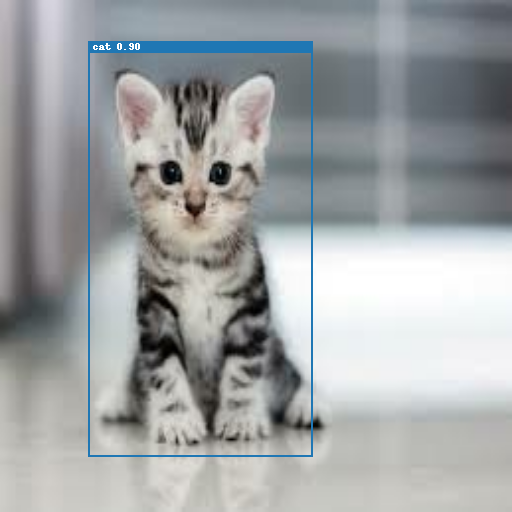

In [9]:
colors = visualizer.colors_per_labels(labels)
visualizer.draw_boxes(image, 
                      boxes=boxes[0], 
                      labels=labels, 
                      scores=scores[0], 
                      colors=colors)